In [1]:
import torch
import torch.nn as nn
import numpy as np
import torchvision
from IPython.display import Image

<img src='img/CNN_0.png' height=50% width=50% />

# Convolutional Layers
### Conv1D

Conv1D creates a convolutional layer that can be implemented in a nerual network.  
When the forward method is called, it computes valid cross-correlation function between input (N, C_in, L) and weight according to 
<img src='img/CNN_0_formula1D.png' height=50% width=50% />
where N is the batch size, C_out is the size of the output and L is the lenght of th einput sequence.
the operator * computes the cross-correlation (the difference with convolution is the sign of the varible we are summing on).
Note that the mode used by np.convolve is "full" so no boundary effects are present (the cc is computed only for those points where the two signals overlap completely).

There is the summation over input channels because the output number of channels has to correspond by definition to the number of filters (output channels i.e. number of weights) we have. 

In [7]:
cl = nn.Conv1d(in_channels=2,out_channels=3,kernel_size=2)
x1 = torch.rand(1,2,4)

In [8]:
x1

tensor([[[0.5263, 0.5980, 0.2248, 0.5857],
         [0.8853, 0.5427, 0.9346, 0.7085]]])

In [9]:
cl(x1)

tensor([[[ 0.4770,  0.4113,  0.6521],
         [-0.9659, -0.6491, -0.9817],
         [ 0.0842,  0.1137, -0.0416]]], grad_fn=<SqueezeBackward1>)

#### optional arguments

stride: is the step at which the cross-correlations are computed. 

padding: controls the amount of implicit zero-paddings on both sides for padding number of points.

dilation: 

groups: controls the connections between inputs and outputs. in_channels and out_channels must both be divisible by groups. For example,

At groups=1, all inputs are convolved to all outputs.
At groups=2, the operation becomes equivalent to having two conv layers side by side, each seeing half the input channels, and producing half the output channels, and both subsequently concatenated.
At groups= in_channels, each input channel is convolved with its own set of filters of size C_out/C_in

In [33]:
x1 = torch.rand(3,4,3)
cl = nn.Conv1d(4,8,2, groups=1)
print(cl(x1))
cl = nn.Conv1d(in_channels=4,out_channels=8,kernel_size=2, groups=4)
print(cl(x1))


tensor([[[ 0.1068,  0.3042],
         [ 0.2017, -0.0955],
         [-0.4905, -0.1482],
         [-0.5387, -0.5528],
         [-0.3839, -0.0224],
         [ 0.0204,  0.0375],
         [ 0.9061,  0.8317],
         [-0.2352,  0.2851]],

        [[ 0.2415,  0.2527],
         [ 0.0141,  0.0045],
         [-0.3263, -0.1666],
         [-0.3543, -0.2868],
         [-0.2933, -0.1523],
         [ 0.1614,  0.0804],
         [ 0.6538,  0.6598],
         [-0.2332,  0.0757]],

        [[ 0.1794,  0.1971],
         [-0.3434, -0.0297],
         [-0.2897, -0.1987],
         [-0.3667, -0.5489],
         [-0.1785, -0.1506],
         [ 0.2972, -0.0150],
         [ 0.5186,  0.5807],
         [-0.1067,  0.1523]]], grad_fn=<SqueezeBackward1>)
tensor([[[-0.1658, -0.0269],
         [ 0.6533,  1.1846],
         [-0.0983, -0.1844],
         [-0.0409, -0.2461],
         [-0.4755, -0.7427],
         [ 0.6401,  0.3461],
         [ 1.0595,  1.0348],
         [ 0.1137,  0.2515]],

        [[-0.2009, -0.2061],
       

In [15]:
x1 = torch.rand(1,4,8)
cl = nn.Conv1d(in_channels=4,out_channels=8,kernel_size=2, stride = 2)
print(cl(x1))


tensor([[[-0.1415, -0.4303, -0.4541, -0.2835],
         [ 0.5674,  0.6165,  0.8222,  0.7672],
         [ 0.3145,  0.1210,  0.2560,  0.2406],
         [-0.3722, -0.3997, -0.5523, -0.1516],
         [-0.3507,  0.1722, -0.3360, -0.5153],
         [-0.0526, -0.1175, -0.2858, -0.1980],
         [ 0.6233,  0.8496,  0.6187,  0.4336],
         [ 0.0950,  0.0949,  0.4148,  0.1799]]], grad_fn=<SqueezeBackward1>)


In [35]:
x1 = torch.rand(3,4,3)
cl = nn.Conv1d(in_channels=4,out_channels=8,kernel_size=2, padding = 4)
print(cl(x1))


tensor([[[ 0.0363,  0.0363,  0.0363,  0.2533,  0.4009,  0.5153,  0.1061,
           0.0363,  0.0363,  0.0363],
         [ 0.1866,  0.1866,  0.1866,  0.3515,  0.3384, -0.1029, -0.0934,
           0.1866,  0.1866,  0.1866],
         [ 0.1952,  0.1952,  0.1952,  0.2486,  0.1768,  0.1418,  0.1937,
           0.1952,  0.1952,  0.1952],
         [ 0.1495,  0.1495,  0.1495,  0.1241, -0.3178, -0.4035, -0.3329,
           0.1495,  0.1495,  0.1495],
         [ 0.2479,  0.2479,  0.2479,  0.4192,  0.4596,  0.9543,  0.2493,
           0.2479,  0.2479,  0.2479],
         [-0.3109, -0.3109, -0.3109, -0.2959, -0.1181,  0.0879, -0.3229,
          -0.3109, -0.3109, -0.3109],
         [ 0.0586,  0.0586,  0.0586,  0.2762,  0.6505,  0.6630,  0.2378,
           0.0586,  0.0586,  0.0586],
         [ 0.1671,  0.1671,  0.1671,  0.2336,  0.2048,  0.1970,  0.3639,
           0.1671,  0.1671,  0.1671]],

        [[ 0.0363,  0.0363,  0.0363,  0.2708,  0.3443,  0.2009,  0.6032,
           0.0363,  0.0363,  0.0363],

# Pooling Layers
### MaxPool1d

In [27]:
# pretty easy and self-explanatory. Also generalization for MaxPool2d is straightforward.
m = nn.MaxPool1d(2, stride=1, return_indices=True)
inp = torch.randn(2, 3, 5)
print(f'input = \n{inp}\n')
output = m(inp)
print(f'output = \n{output[0]}')
print(f'output = \n{output[1]}')

input = 
tensor([[[-0.3541, -0.2687, -0.4812,  1.0095, -0.0977],
         [ 1.2322, -0.6976,  0.3482, -0.5973,  0.2829],
         [-0.2630, -0.0045,  0.2014,  1.8985, -0.6775]],

        [[-0.2400,  1.4647, -0.0685, -0.2705, -0.6889],
         [-0.3335,  0.9157,  1.3174,  0.6771, -1.8515],
         [-2.2814,  2.1701, -0.3036, -0.0586, -1.4421]]])

output = 
tensor([[[-0.2687, -0.2687,  1.0095,  1.0095],
         [ 1.2322,  0.3482,  0.3482,  0.2829],
         [-0.0045,  0.2014,  1.8985,  1.8985]],

        [[ 1.4647,  1.4647, -0.0685, -0.2705],
         [ 0.9157,  1.3174,  1.3174,  0.6771],
         [ 2.1701,  2.1701, -0.0586, -0.0586]]])
output = 
tensor([[[1, 1, 3, 3],
         [0, 2, 2, 4],
         [1, 2, 3, 3]],

        [[1, 1, 2, 3],
         [1, 2, 2, 3],
         [1, 1, 3, 3]]])


### MaxUnpool1d

In [31]:
"""
Computes a partial inverse of MaxPool1d.

MaxPool1d is not fully invertible, since the non-maximal values are lost.

MaxUnpool1d takes in as input the output of MaxPool1d including the indices of the maximal
values and computes a partial inverse in which all non-maximal values are set to zero.
"""
pool = nn.MaxPool1d(2, stride=2, return_indices=True)
unpool = nn.MaxUnpool1d(2, stride=2)
input = torch.tensor([[[1., 2, 3, 4, 5, 6, 7, 8]]])
output, indices = pool(input)
print(input)
print(output)
print(indices)
unpool(output, indices)

tensor([[[1., 2., 3., 4., 5., 6., 7., 8.]]])
tensor([[[2., 4., 6., 8.]]])
tensor([[[1, 3, 5, 7]]])


tensor([[[0., 2., 0., 4., 0., 6., 0., 8.]]])

In [32]:
### AvgPool1d same as max but with average

In [ ]:
### FractionalMaxPool2d there is a paper about this operation... 
#   https://arxiv.org/abs/1412.6071

In [33]:
### AdaptiveMaxPool : somehow equivalent to normal maxpool with some different argument to control the output dimension
"""
as far as the term “Adaptive” is concerned, it makes the following two lines of code equivalent:
AvgPool2d(kernel_size=7, stride=7, padding=0) //Here the three parameters 
ensure that the output activation has1by1 dimension
nn.AdaptiveAvgPool2d(1) //Here we don’t specify the kernel_size, stride or padding. 
Instead, we specify the output dimension i.e 1by1
"""

'\nas far as the term “Adaptive” is concerned, it makes the following two lines of code equivalent:\nAvgPool2d(kernel_size=7, stride=7, padding=0) //Here the three parameters \nensure that the output activation has1by1 dimension\nnn.AdaptiveAvgPool2d(1) //Here we don’t specify the kernel_size, stride or padding. \nInstead, we specify the output dimension i.e 1by1\n'

# Padding Layers
### ReflectionPad1d

In [42]:
ref = nn.ReflectionPad1d(2)
inp = torch.Tensor([[[1,22,33,4,5]]])
out = ref(inp)
print(out)

tensor([[[33., 22.,  1., 22., 33.,  4.,  5.,  4., 33.]]])


### ReplicationPad1d

In [46]:
#replicates the last and first value of each 1d tensor

ref = nn.ReplicationPad1d(2)
inp = torch.Tensor([[[1,2,3,4,5,6,7,8],[11,12,13,14,15,16,17,18]]])
out = ref(inp)
print(out)

tensor([[[ 1.,  1.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  8.,  8.],
         [11., 11., 11., 12., 13., 14., 15., 16., 17., 18., 18., 18.]]])


### ConstantPad1d

In [49]:
m = nn.ConstantPad1d(2, 3.5)
input = torch.randn(1, 2, 4)
input
m(input)

tensor([[[ 3.5000,  3.5000,  1.6734,  0.1705, -1.0744,  0.3329,  3.5000,
           3.5000],
         [ 3.5000,  3.5000, -0.0948, -0.6856,  0.1942, -0.3150,  3.5000,
           3.5000]]])

##  Simple example of a CNN

In [60]:
import torchvision
import torchvision.datasets as datasets
import matplotlib.pyplot as plt
import torch.nn.functional as F
# define the structure of the net

In [104]:
# create the Dataset object by loading MNIST and assigning transform
mnist_trainset = datasets.MNIST(root='./data', 
                                train=True, 
                                download=True, 
                                transform=torchvision.transforms.ToTensor())

In [117]:
# create a train loader for training
train_loader = torch.utils.data.DataLoader(
                 dataset=mnist_trainset,
                 batch_size=1,
                 shuffle=True)

In [122]:
image, label = next(iter(train_loader))
image.shape

torch.Size([1, 1, 28, 28])

In [128]:

class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=20, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(20, 50, 5, 1)
        self.fc1 = nn.Linear(4*4*50, 500)
        self.fc2 = nn.Linear(500, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = F.max_pool2d(x, 2, 2)
        x = F.relu(self.conv2(x))
        x = F.max_pool2d(x, 2, 2)
        x = x.view(-1, 4*4*50)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x
    

model = CNN()

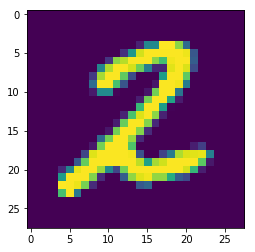

In [129]:
plt.imshow(image.numpy()[0][0])
plt.show()

In [130]:
print(model(image))

tensor([[ 0.0465,  0.1039,  0.0145, -0.0196, -0.0103,  0.0055, -0.0383,  0.0069,
         -0.0028, -0.0145]], grad_fn=<AddmmBackward>)
